<a href="https://colab.research.google.com/github/romanzes637/tensor/blob/master/clust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# optional
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import time
import os
import numpy as np
import pickle

In [3]:
t0 = time.time()
name = 'test5'
gdir = '/gdrive/My Drive/Colab Notebooks'
update = False
if update:
  s0 = 1  # step
  s1 = 35
  paths = ['/gdrive/My Drive/Colab Notebooks/tube10El/{}/devStr'.format(x) 
  for x in range(s0, s1)]
  times = list()
  ts = list()
  c0 = 0  # cell
  c1 = 69030
  for i, p in enumerate(paths):
    print('{}/{} {}'. format(i + 1, len(paths), p))
    with open(p) as f:
      lines = f.readlines()
      t = np.array([[float(y) for y in x.strip()[1:-1].split()] 
                    for x in lines[18:-5]])[c0:c1]
      ts.append(t)
      times.append(np.full(len(t), i + 1))
  ts = np.vstack(ts)
  times = np.hstack(times)
  np.save(os.path.join(gdir, 'ts_{}'.format(name)), ts)
  np.save(os.path.join(gdir, 'times_{}'.format(name)), times)
else:
  ts = np.load(os.path.join(gdir, 'ts_{}.npy'.format(name)))
  times = np.load(os.path.join(gdir, 'times_{}.npy'.format(name)))
print('{:.3f}s'.format(time.time() - t0))
print(len(ts), ts[0], ts[-1])
print(len(times), times[0], times[-1])

0.088s
544000 [-1.11442e+06  5.29497e+06 -1.79275e-01 -5.22253e+05 -1.45083e+00
  1.63667e+06] [-1.40360e+07  3.08915e+07  3.49738e-01 -2.03111e+07 -2.18567e-01
  3.43470e+07]
544000 1 34


In [0]:
def tensor_sort(t):
  at_map = {
      (1, 2): 3, (2, 1): 3,
      (0, 2): 4, (2, 0): 4,
      (0, 1): 5, (1, 0): 5
  }
#   st = t[:3]  # Voight XX YY ZZ YZ XZ XY 
  st = np.array([t[0], t[3], t[5]])  # XX XY XZ YY YZ ZZ
  sort_st = np.argsort(-np.abs(st))
  ind = np.array([sort_st[0], 
                  sort_st[1], 
                  sort_st[2], 
                  at_map[(sort_st[0], sort_st[1])],
                  at_map[(sort_st[1], sort_st[2])],
                  at_map[(sort_st[2], sort_st[0])]])
  new_t = t[ind]
  return new_t

def tensors_stat(ts):
  stat = dict()
  for t in ts:
    tt = tuple(t)
    stat[tt] = stat.get(tt, 0) + 1
  return stat
   
def tensors_groups(ts, ndigits=2):
  groups = dict()
  for i, t in enumerate(ts): 
    tt = tuple(round(x, ndigits) for x in t)
    groups.setdefault(tt, list()).append(i)
  map_tensor_group = dict()
  for gi, (k, v) in enumerate(groups.items()):
    for ti in v:
      map_tensor_group[ti] = gi
  return groups, map_tensor_group

def tensors_principals(ts):
  # return [[max, int, min], ...]
  ps = np.apply_along_axis(lambda x: np.sort(np.linalg.eigvalsh(np.array(
      [[x[0], x[1], x[2]], 
       [x[1], x[3], x[4]], 
       [x[2], x[4], x[5]]])))[::-1], 1, ts)
  return ps

# tensors_principals(ts)
# t = np.array([1, 2, -3, 2, 0, 1])
# tensor_sort(t)
# ts = np.array([
#     [1, 2, -3, 2, 0, 1],
#     [1, 2, -3, 2, 0, 1]
# ])
# print(ts)
# ts = np.apply_along_axis(tensor_sort, 1, ts)
# print(ts)
# ts = np.apply_along_axis(
#     lambda x: x / max(np.abs(x)) if max(np.abs(x)) != 0 else x, 1, ts)
# print(ts)
# tensors_group(ts, 2)

In [5]:
update = False
t0 = time.time()

if update:
  print(len(ts))
  print(ts[0])
  X = ts.copy()
  max_abs = np.amax(np.abs(X), axis=1)
  print(max_abs[0])
  sum_abs = np.sum(np.abs(X), axis=1)
  print(sum_abs[0])
  # Threshold
  threshold = 1e6
  # X = X[max_abs > threshold]
  # x_max_abs = max_abs[max_abs > threshold]
  # x_sum_abs = sum_abs[max_abs > threshold]
  X = X[sum_abs > threshold]
  x_max_abs = max_abs[sum_abs > threshold]
  x_sum_abs = sum_abs[sum_abs > threshold]
  times = times[sum_abs > threshold]
  print(len(X))
  print(X[0])
  # Sort tensors (max, int, min, max-int, int-min, min-max)
  X = np.apply_along_axis(tensor_sort, 1, X)
  print(X[0])
  # Normalize to interval [-1, 1]
  X = np.apply_along_axis(
      lambda x: x / max(np.abs(x)) if max(np.abs(x)) != 0 else x, 1, X)
  print(X[0])
  # Normalize to distinct: -1, 0 and 1, 0.5, -0.5
  # X2 = X.copy()
  # print(X[-1])
  # print(X2[-1])
  # X2[(X2 > -1e-3) & (X2 < 1e-3)] = 0
  # # X2[(X2 > 0) & (X2 <= 0.5)] = 0.5
  # # X2[(X2 < 0) & (X2 >= -0.5)] = -0.5
  # # X2[(X2 > 0.5)] = 1
  # # X2[(X2 < -0.5)] = -1
  # X2[X2 > 0] = 1
  # X2[X2 < 0] = -1
  # print(X[-1])
  # print(X2[-1])
  # Groups of identical tensors
  gs, map_tg = tensors_groups(X, 1)
  gs_ps = tensors_principals(np.array(list(gs)))
  gs_times = [{times[x] for x in y} for y in gs.values()]
  gs_max_abs = np.array([max([x_max_abs[x] for x in y]) for y in gs.values()])
  gs_sum_abs = np.array([max([x_sum_abs[x] for x in y]) for y in gs.values()])
  gs_mean_max_abs = np.array([np.mean([x_max_abs[x] for x in y]) for y in gs.values()])
  gs_mean_sum_abs = np.array([np.mean([x_sum_abs[x] for x in y]) for y in gs.values()])
  gs_std_max_abs = np.array([np.std([x_max_abs[x] for x in y]) for y in gs.values()])
  gs_std_sum_abs = np.array([np.std([x_sum_abs[x] for x in y]) for y in gs.values()])
  print(len(gs))
  print(gs_times[0])
  print(gs_ps[0])
  print(gs_max_abs[0])
  print(gs_sum_abs[0])
  print(gs_mean_max_abs[0])
  print(gs_mean_sum_abs[0])
  print(gs_std_max_abs[0])
  print(gs_std_sum_abs[0])
  X = np.array(list(gs))
  # # print(X3)
  # # Evaluate distinct categories
  # X3D = X3.copy()
  # X3D[(X3D > -1e-3) & (X3D < 1e-3)] = 0
  # # X3D[(X3D > 0) & (X3D <= 0.5)] = 0.5
  # # X3D[(X3D < 0) & (X3D >= -0.5)] = -0.5
  # # X3D[(X3D > 0.5)] = 1
  # # X3D[(X3D < -0.5)] = -1
  # X3D[X3D > 0] = 1
  # X3D[X3D < 0] = -1
  # print(X3D[0])
  # x3d_gs, x3d_tg = tensors_groups(X3D)
  np.save(os.path.join(gdir, 'X_{}'.format(name)), X)
  np.save(os.path.join(gdir, 'gs_ps_{}'.format(name)), gs_ps)
  np.save(os.path.join(gdir, 'gs_max_abs_{}'.format(name)), gs_max_abs)
  np.save(os.path.join(gdir, 'gs_sum_abs_{}'.format(name)), gs_sum_abs)
  with open(os.path.join(gdir, 'gs_times_{}.pickle'.format(name)), 'wb') as f:
    pickle.dump(gs_times, f, protocol=pickle.HIGHEST_PROTOCOL)
  with open(os.path.join(gdir, 'groups_{}.pickle'.format(name)), 'wb') as f:
    pickle.dump(gs, f, protocol=pickle.HIGHEST_PROTOCOL)
  with open(os.path.join(gdir, 'map_tg_{}.pickle'.format(name)), 'wb') as f:
    pickle.dump(map_tg, f, protocol=pickle.HIGHEST_PROTOCOL)
else:
  X = np.load(os.path.join(gdir, 'X_{}.npy'.format(name)))
  gs_ps = np.load(os.path.join(gdir, 'gs_ps_{}.npy'.format(name)))
  gs_max_abs = np.load(os.path.join(gdir, 'gs_max_abs_{}.npy'.format(name)))
  gs_sum_abs = np.load(os.path.join(gdir, 'gs_sum_abs_{}.npy'.format(name)))
  with open(os.path.join(gdir, 'gs_times_{}.pickle'.format(name)), 'rb') as f:
    gs_times = pickle.load(f)
  with open(os.path.join(gdir, 'groups_{}.pickle'.format(name)), 'rb') as f:
    gs = pickle.load(f)
  with open(os.path.join(gdir, 'map_tg_{}.pickle'.format(name)), 'rb') as f:
    map_tg = pickle.load(f)
print('{:.3f}s'.format(time.time() - t0))

0.188s


Isomap: 0.017 sec
MDS: 0.1 sec
SpectralEmbedding: 0.024 sec


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


t-SNE: 1.2 sec


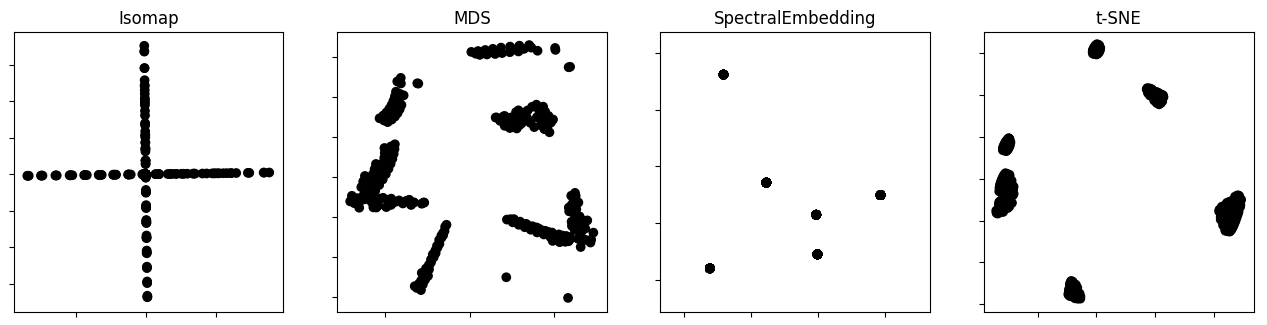

In [10]:
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets, preprocessing

style.use('default')
# Next line to silence pyflakes. This import is needed.
Axes3D  

fig = plt.figure(figsize=(16, 8))
n_points = len(X)
n_neighbors = 10
n_components = 2
# plt.suptitle("Manifold Learning with %i points, %i neighbors"
#              % (n_points, n_neighbors), fontsize=14)
# color = np.array([x3d_tg[i] for i, _ in enumerate(X3)])
color = np.ones(len(X))  # black


# ax = fig.add_subplot(251, projection='3d')
# ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.view_init(4, -72)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

YS = list()
# for i, method in enumerate(methods):
#     t0 = time()
#     Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
#                                         eigen_solver='auto',
#                                         method=method).fit_transform(X3)
#     t1 = time()
#     print("%s: %.2g sec" % (methods[i], t1 - t0))

#     ax = fig.add_subplot(241 + i)
#     plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.gray)
# #     plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
#     plt.title("%s" % (labels[i]))
#     ax.xaxis.set_major_formatter(NullFormatter())
#     ax.yaxis.set_major_formatter(NullFormatter())
#     plt.axis('tight')
#     YS.append(Y)

t0 = time()
Y_iso = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(245)
plt.scatter(Y_iso[:, 0], Y_iso[:, 1], c=color, cmap=plt.cm.gray)
plt.title("Isomap")
# plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y_mds = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(246)
plt.scatter(Y_mds[:, 0], Y_mds[:, 1], c=color, cmap=plt.cm.gray)
plt.title("MDS")
# plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y_se = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(247)
plt.scatter(Y_se[:, 0], Y_se[:, 1], c=color, cmap=plt.cm.gray)
plt.title("SpectralEmbedding")
# plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y_tsne = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(248)
plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=color, cmap=plt.cm.gray)
plt.title("t-SNE")
# plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

t-SNE: 0.0057 sec
(278, 2)


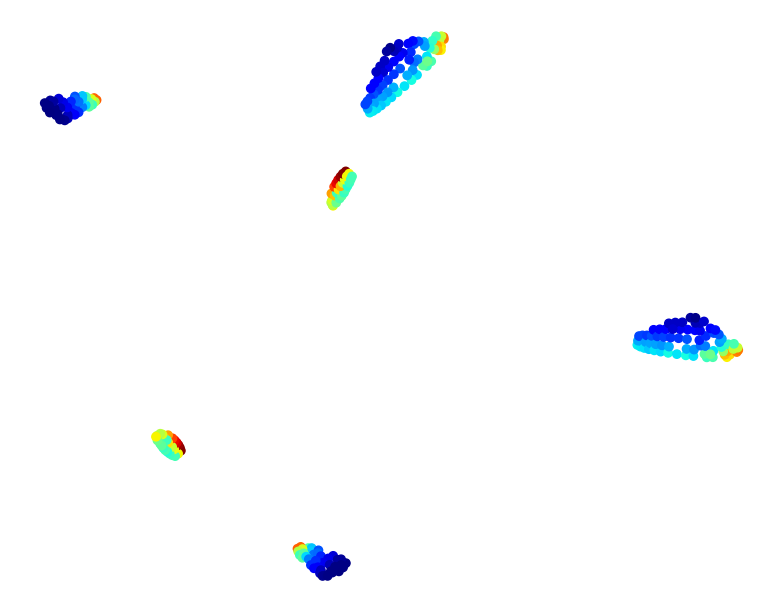

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets, preprocessing

# Next line to silence pyflakes. This import is needed.
Axes3D  

fig = plt.figure(figsize=(8, 8))
update = False
t0 = time.time()
if update:  # rate is about of 10000 points/sec
  n_points = len(X)
  print(n_points)
  n_neighbors = 10
  n_components = 2
  tsne = manifold.TSNE(n_components=n_components, 
                       perplexity=30,
                       early_exaggeration=12.,
                       learning_rate=200.,
                       init='random',
                       n_iter=1000,
                       verbose=1,
                       method='barnes_hut',
                       random_state=None)
  Y4S = tsne.fit_transform(X)
  t1 = time.time()
  np.save('/gdrive/My Drive/Colab Notebooks/Y4S_{}'.format(name), Y4S)
  Y4 = np.array([Y4S[map_tg[i]] for i, _ in enumerate(X)])
  np.save('/gdrive/My Drive/Colab Notebooks/Y4_{}'.format(name), Y4)
else:
  Y4 = np.load('/gdrive/My Drive/Colab Notebooks/Y4_{}.npy'.format(name))
  Y4S = np.load('/gdrive/My Drive/Colab Notebooks/Y4S_{}.npy'.format(name))
  t1 = time.time()
print("t-SNE: %.2g sec" % (t1 - t0))
print(Y4.shape)
# Colors
# print(color[-1])
# color = color / max(color)
# print(color[-1])
scolor = np.array([gs_max_abs[i] for i, _ in enumerate(X)])
# print(scolor[1])
# ax = fig.add_subplot(2, 5, 10)
ax = fig.add_subplot(1, 1, 1)
plt.scatter(Y4S[:, 0], Y4S[:, 1], c=scolor, cmap=plt.cm.jet)
# plt.scatter(Y4[:, 0], Y4[:, 1], c=color, cmap=plt.cm.viridis)
# start = 30000
# end = 35001
# plt.scatter(Y4[start:end, 0], Y4[start:end, 1], c=color[start:end], cmap=plt.cm.viridis)
# ax.set_facecolor('black')
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_aspect('equal')
plt.tight_layout()
plt.axis('off')
plt.show()

In [14]:
%matplotlib inline

from sklearn.cluster import DBSCAN
from itertools import cycle, islice
from ipywidgets import interact, interactive, interact_manual
import matplotlib.pyplot as plt
# Y4S = Y_tsne
YC = Y4S
labels = [0 for x in YC]
def clusterize(eps=3., min_samples=2):
  clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(YC)
  global labels 
  labels = clustering.labels_.astype(np.int)
  labels = [x + 1 for x in labels]
#   print(len(y_pred), len(Y_mds))
  print(len(set(labels)), set(labels))
#   colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
#                                        '#f781bf', '#a65628', '#984ea3',
#                                        '#999999', '#e41a1c', '#dede00']),
#                                         int(max(labels) + 1))))
#   add black color for outliers (if any)
#   colors = np.append(colors, ["#000000"])
  plt.figure(figsize=(5, 5))
#   plt.scatter(YC[:, 0], YC[:, 1], s=10, color=colors[labels])
  plt.scatter(YC[:, 0], YC[:, 1], s=10, c=labels, cmap=plt.cm.tab20)
  ax.set_aspect('equal')
  plt.tight_layout()
  plt.show()
  return labels

p = interactive(clusterize, eps=(.01, 10, .01), min_samples=(1, 100, 1))
p

interactive(children=(FloatSlider(value=3.0, description='eps', max=10.0, min=0.01, step=0.01), IntSlider(valu…

In [0]:
import pandas as pd

# groups = [' | '.join(map('{}'.format, x)) for x in x3d_gs]
# kind = np.array([groups[x3d_tg[i]] for i, _ in enumerate(X)])
cnt = np.array([len(x) for x in gs.values()])
clusters_tensors = dict()
for i, label in enumerate(labels):
  clusters_tensors.setdefault(label, list()).append(i)
clusters_means = dict()
for k, v in clusters_tensors.items():
  tensors = [X[x] for x in v]
  m = np.mean(tensors, axis=0)
  clusters_means[k] = ' | '.join(map('{: .2f}'.format, m))
clusters = ['{:{align}{width}}. '.format(x, align='>', width='3') + clusters_means[x] for i, x in enumerate(labels)]
tags = ['tag_{}'.format(i) for i, _ in enumerate(Y4S)]
phi = np.pi / 6 
c = 10e6
abs_p1 = gs_max_abs*gs_ps[:, 0]
abs_p2 = gs_max_abs*gs_ps[:, 1]
abs_p3 = gs_max_abs*gs_ps[:, 2]
mean_normal = 0.5*(abs_p1 + abs_p3)
max_shear = 0.5*(abs_p1 - abs_p3)
limit_max_shear = mean_normal*np.sin(phi) + np.full_like(mean_normal, c) * np.cos(phi)
mc = limit_max_shear - max_shear
df = pd.DataFrame({
  'x': Y4S[:, 0], 'y': Y4S[:, 1], 'cnt': cnt,
  'cluster': clusters, 'tag': tags,
  'p1': abs_p1, 
  'p2': abs_p2,
  'p3': abs_p3,
  'mean_normal': mean_normal,
  'max_shear': max_shear,
  'mc': mc,
  'times': [','.join(map('{}'.format, x)) for x in gs_times],
  'max_abs': gs_max_abs, 'sum_abs': gs_sum_abs,
  '11': X[:, 0], '22': X[:, 1], '33': X[:, 2],
  '12': X[:, 3], '23': X[:, 4], '13': X[:, 5]})

In [19]:
import altair as alt
alt.data_transformers.enable(max_rows=None)
alt.renderers.set_embed_options(theme='Default')  # 'Default'

interval = alt.selection_interval(
  zoom=False,
  on='[mousedown[event.button === 0], window:mouseup] > window:mousemove!'
#   clear='[mousedown[event.button === 2], window:mouseup] > window:mousemove!'
)
scale = alt.selection_interval(
  bind='scales',
  translate='[mousedown[event.button === 1], window:mouseup] > window:mousemove!'
)
size = 350
# input_checkbox = alt.binding_checkbox()
# checkbox_selection = alt.selection_single(bind=input_checkbox, name="color")
columns = ['max_abs', 'sum_abs', 'p1', 'p2', 'p3', 
           '11', '22', '33', '12', '23', '13',
           'mean_normal', 'max_shear', 'mc']
input_dropdown = alt.binding_select(options=columns, name='columns')
selection = alt.selection_single(fields=['column'], 
                                 bind=input_dropdown, 
                                 name='columns', 
                                 empty='all',
                                 clear=False,
                                 on="click[event.shiftKey&!event.shiftKey]",
                                 resolve='global',
                                 init={'column': 'max_abs'})

points = alt.Chart(width=size, height=size).transform_fold(
  columns,
  as_=['column', 'value']
).transform_calculate(
  url='https://www.google.com/search?q=' + alt.datum.cnt
).mark_circle().encode(
  alt.X('x:Q', axis=alt.Axis(title='', grid=False)),
  alt.Y('y:Q', axis=alt.Axis(title='', grid=False)),
#   color=alt.condition(selection,
#                       alt.Color('value:Q'),
#                       alt.value('red')),
  color=alt.Color('value:Q', sort='descending',
                  scale=alt.Scale(nice=False,
                  scheme=alt.SchemeParams(name='redblue'))),
#   color=alt.Color('clusters:N', sort='descending',
#                   scale=alt.Scale(nice=False,
#                   scheme=alt.SchemeParams(name='redblue'))),
#   color=alt.condition(selection,
#     alt.Color('value:Q', sort='descending',
#     scale=alt.Scale(nice=False, scheme=alt.SchemeParams(name='redblue'))),
#     alt.Color('cluster:N')),
  # color=alt.condition(
  #     checkbox_selection,
  #      alt.value('lightgrey'),
  #      alt.value('blue')),
  # alt.Color('value:Q', sort='descending', 
  #           scale=alt.Scale(scheme=alt.SchemeParams(name='redblue'))),
  # alt.Color('value:Q',
  #           scale=alt.Scale(scheme=alt.SchemeParams(name='lightmulti')))),
  # color=alt.condition(selection,
  #                     alt.Color('p1:Q', legend=None),
  #                     alt.value('lightgray'))
  # color=alt.condition(interval, alt.Color(
  #     'max_abs:Q', legend=alt.Legend(labelLimit=200),
  #     scale=alt.Scale(scheme=alt.SchemeParams(name='lightmulti'))),
  #     alt.value('lightgrey')),
  #   color=alt.condition(interval, alt.Color(
  #       'cluster:N', legend=alt.Legend(labelLimit=200), sort=None),
  #       alt.value('lightgrey')),
    # size='cnt:Q',
  #   size='sum_abs:Q',
  #   href='url:N',
  tooltip=['cnt:Q', '11:N', '22:N', '33:N', '12:N', '23:N', '13:N', 
           'cluster:N', 'tag:N', 'url:N', 'max_abs:Q', 'sum_abs:Q', 
           'p1:Q', 'p2:Q', 'p3:Q', 'mean_normal:Q', 'max_shear:Q', 'mc:Q',
           'times:N']
).add_selection(
    selection,
    interval,
    scale
    # checkbox_selection
).transform_filter(
  selection
)
# ).transform_filter(selection)
# base = alt.Chart().transform_filter(interval).transform_aggregate(
#     mn11 = 'mean(11)', md11 = 'median(11)',
#     mn22 = 'mean(22)', md22 = 'median(22)',
#     mn33 = 'mean(33)', md33 = 'median(33)',
#     mn12 = 'mean(12)', md12 = 'median(12)',
#     mn23 = 'mean(23)', md23 = 'median(23)',
#     mn13 = 'mean(13)', md13 = 'median(13)'
# ).transform_fold(['mn11', 'md11', 'mn22', 'md22', 'mn33', 'md33',
#                   'mn12', 'md12', 'mn23', 'md23', 'mn13', 'md13'])
# bar = base.mark_bar(stroke='transparent').encode(
#     x=alt.X('key:N', axis=alt.Axis(title='component'), 
#             sort=['mn11', 'md11', 'mn22', 'md22', 'mn33', 'md33',
#                   'mn12', 'md12', 'mn23', 'md23', 'mn13', 'md13']),
#     y=alt.Y('value:Q', axis=alt.Axis(title='mean, median'))
# #             scale=alt.Scale(domain=(-1, 1)))
# #     tooltip=['mn11:Q', 'md11:Q', 'mn22:Q', 'md22:Q', 'mn33:Q', 'md33:Q',
# #              'mn12:Q', 'md12:Q', 'mn23:Q', 'md23:Q', 'mn13:Q', 'md13:Q']
# #     color=alt.Color('key:N', legend=None, scale=alt.Scale(
# #         scheme=alt.SchemeParams(name='dark2', count=2))),
#     ).properties(height=100, width=size)
# error_bar = base2.transform_aggregate(
#     m='mean(value)',
#     s='stdevp(value)',
#     groupby=['key']
# ).transform_calculate(
#     s0='datum.m + datum.s',
#     s1='datum.m - datum.s'
# ).mark_rule().encode(
#     x=alt.X('key:N'),
#     y=alt.Y('s0:Q'),
#     y2=alt.Y2('s1:Q'),
#     color=alt.value('red')
# )
base = alt.Chart(height=100, width=size).transform_filter(
    interval).transform_fold(['11', '22', '33', '12', '23', '13'])
mean_bar = base.mark_bar(stroke='transparent').encode(
    x=alt.X('key:N', axis=alt.Axis(title='component')),
    y=alt.Y('mean(value):Q', scale=alt.Scale(domain=[-1, 1]), 
            axis=alt.Axis(title='mean, median, range'))
)
range_rule = base.mark_rule(color='red', strokeWidth=2).encode(
    x=alt.X('key:N'),
    y=alt.Y('min(value):Q', scale=alt.Scale(domain=[-1, 1])),
    y2=alt.Y2('max(value):Q')
)
median_tick = base.mark_tick(color='yellow', thickness=2, size=30).encode(
    x=alt.X('key:N'),
    y=alt.Y('median(value):Q', scale=alt.Scale(domain=[-1, 1]))
)
text = alt.Chart().mark_text(dx=-100, dy=-60).encode(text='sum(cnt):Q').transform_filter(interval)
text2 = alt.Chart().mark_text(dx=0, dy=-60).encode(text='max(max_abs):Q').transform_filter(interval)
text3 = alt.Chart().mark_text(dx=100, dy=-60).encode(text='max(sum_abs):Q').transform_filter(interval)
text4 = alt.Chart().mark_text(dx=-100, dy=-75).encode(text=alt.value('cnt'))
text5 = alt.Chart().mark_text(dx=0, dy=-75).encode(text=alt.value('max_abs'))
text6 = alt.Chart().mark_text(dx=100, dy=-75).encode(text=alt.value('sum_abs'))

tensors = alt.vconcat(points, 
                      mean_bar + range_rule + median_tick + text + text2 + text3 + text4 + text5 + text6, 
                      data=df)

tensors.save(os.path.join(gdir, '{}.html').format(name))
tensors

VConcatChart({
  data:              x          y   cnt  ...   12   23   13
  0   -23.574978  13.033189  1360  ... -0.0  0.3 -0.1
  1   -23.795649  13.210541  1360  ... -0.0  0.3 -0.1
  2   -23.725641  12.879006   680  ... -0.0  0.4 -0.1
  3   -24.029461  13.123178  2720  ... -0.0  0.4 -0.1
  4   -23.957083  12.616626   680  ...  0.0  0.4 -0.2
  5   -24.241961  12.430550  2040  ... -0.0  0.5 -0.2
  6   -24.258188  12.837882   680  ... -0.0  0.5 -0.1
  7   -24.544399  12.568572  1360  ...  0.0  0.5 -0.2
  8   -24.841816  12.397429  2720  ...  0.0  0.6 -0.2
  9   -25.173960  11.938288  1360  ...  0.0  0.7 -0.3
  10  -25.500011  12.399865  1360  ...  0.0  0.7 -0.2
  11  -25.838539  11.886150  2040  ...  0.0  0.8 -0.3
  12  -25.518471  11.718722   680  ...  0.0  0.8 -0.3
  13  -26.135645  11.395051  1360  ...  0.0  0.9 -0.4
  14  -26.150944  11.698108  1360  ...  0.0  0.9 -0.3
  15  -26.727249  11.352723  2040  ...  0.0  1.0 -0.4
  16  -26.410761  11.221045   680  ...  0.0  1.0 -0.4
  17  -26.843048  11.301804  2720  ...  0.0  1.0 -0.4
  18    7.350385  18.447784  2040  ... -0.0  0.1  0.3
  19    7.318923  18.640051   680  ... -0.0  0.0  0.3
  20    7.125241  18.714397  1360  ... -0.0  0.0  0.4
  21    6.954247  18.357189  1360  ... -0.0  0.1  0.4
  22  -24.523205  13.316685  1360  ...  0.0  0.5 -0.0
  23    6.649661  18.712765  1360  ... -0.0  0.0  0.5
  24  -24.853069  13.116814  1360  ...  0.0  0.5 -0.1
  25  -24.842562  13.397342  1360  ...  0.0  0.5 -0.0
  26  -25.169651  12.879252  1360  ...  0.0  0.6 -0.1
  27  -25.506298  13.346704   680  ...  0.0  0.6 -0.0
  28  -25.515755  13.084086   680  ...  0.0  0.6 -0.1
  29  -25.859037  12.904106  2720  ...  0.0  0.7 -0.1
  ..         ...        ...   ...  ...  ...  ...  ...
  248  -3.818801 -27.059172   680  ... -0.6  0.6  0.0
  249  -4.243388 -27.434671  1360  ... -0.5  0.6  0.0
  250  -3.870916 -27.311710   680  ... -0.6  0.6  0.0
  251  -3.596545 -27.579239  2720  ... -0.6  0.7  0.0
  252  -2.956870 -27.785725  1360  ... -0.7  0.8  0.0
  253  -3.419958 -28.168888  1360  ... -0.6  0.8  0.0
  254  -2.824970 -28.347933  2720  ... -0.7  0.9  0.0
  255  -2.337464 -28.519447  1360  ... -0.8  1.0  0.0
  256  -2.717152 -28.928558  1360  ... -0.7  1.0  0.0
  257  -2.587080 -29.041016  2720  ... -0.7  1.0  0.0
  258  -5.400124 -26.752354  1360  ... -0.3  0.3  0.0
  259  -5.686805 -26.914480  1360  ... -0.2  0.3 -0.0
  260  -5.239052 -26.948467  2720  ... -0.3  0.4  0.0
  261  -5.621778 -27.160114   680  ... -0.2  0.4 -0.0
  262  -5.479739 -27.475611   680  ... -0.3  0.4 -0.0
  263  -5.118171 -27.328024   680  ... -0.3  0.5  0.0
  264  -5.246661 -27.720547  2040  ... -0.3  0.5 -0.0
  265  -4.913387 -27.626932  1360  ... -0.4  0.5  0.0
  266  -4.677933 -27.848650  2720  ... -0.4  0.6  0.0
  267  -4.063297 -27.989853  1360  ... -0.5  0.7  0.0
  268  -4.492263 -28.371399  1360  ... -0.4  0.7  0.0
  269  -3.862362 -28.566685  2040  ... -0.5  0.8  0.0
  270  -4.212783 -28.659283   680  ... -0.4  0.8  0.0
  271  -3.600766 -28.824499  1360  ... -0.5  0.9  0.0
  272  -3.684267 -29.102692  1360  ... -0.5  0.9  0.0
  273  -3.102207 -29.275333  2040  ... -0.6  1.0  0.0
  274  -3.452192 -29.341574   680  ... -0.5  1.0  0.0
  275  -3.003878 -29.337439  2720  ... -0.6  1.0 -0.0
  276   5.879304  16.483145   640  ...  0.0  0.4  0.5
  277  31.074989  -9.612329   640  ... -0.8  0.0  0.5
  
  [278 rows x 20 columns],
  vconcat: [Chart({
    encoding: FacetedEncoding({
      color: Color({
        field: 'value',
        scale: Scale({
          nice: False,
          scheme: SchemeParams({
            name: 'redblue'
          })
        }),
        sort: 'descending',
        type: 'quantitative'
      }),
      tooltip: [Tooltip({
        field: 'cnt',
        type: 'quantitative'
      }), Tooltip({
        field: '11',
        type: 'nominal'
      }), Tooltip({
        field: '22',
        type: 'nominal'
      }), Tooltip({
        field: '33',
        type: 'nominal'
      }), Tooltip({
        field

In [0]:
import altair as alt
from vega_datasets import data


columns = ['Acceleration', 'Cylinders', 'Displacement', 'Horsepower']

select_box = alt.binding_select(options=columns, name='column')
sel = alt.selection_single(fields=['column'], 
                           bind=select_box,
                           init={'column': 'Acceleration'},
                           clear=False)

alt.Chart(data.cars()).transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel  
).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='value:Q',
    color='Origin:N'
).add_selection(
    sel
)

In [0]:
import matplotlib.pyplot as plt
from matplotlib import animation, style, cm
style.use('dark_background')
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
cmap = cm.get_cmap('viridis')
colors = cmap(color)
def draw_3d_update(frame, m, n):
  d = 3
  i = int(frame / m)
  k = frame / m - i
  prev_start = i * n
  prev_end = i * n + n
  start = (i + 1) * n
  end = (i + 1) * n + n
  if end > len(Y4):
    start = prev_start
    end = prev_end
  print(n, m, i, i + 1, prev_start, prev_end, start, end, k)
  cs = colors[start:end]
  ps = Y4[start:end]
  prev_ps = Y4[prev_start:prev_end]
  prev_cs = colors[prev_start:prev_end]
  delta_ps = ps - prev_ps
  delta_cs = cs - prev_cs
  cur_ps = prev_ps + k * delta_ps
  cur_cs = prev_cs + k * delta_cs
  ax.cla()
  ax.scatter(cur_ps[:, 0], cur_ps[:, 1], s=1**2, c=cur_cs)
  ax.set_xlim(min(Y4[:, 0]) - d, max(Y4[:, 0]) + d)
  ax.set_ylim(min(Y4[:, 1]) - d, max(Y4[:, 1]) + d)
#   ax.set_xlim(-6.5, -2)
#   ax.set_ylim(1, 5.5)
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
  ax.set_aspect('equal')
  plt.axis('off')
  plt.tight_layout()
steps = 35
m = 5
n = 16000
ani = animation.FuncAnimation(fig, draw_3d_update, (steps - 1)*m + 1, 
                              fargs=[m, n], interval=200, blit=False)
ani.save('/gdrive/My Drive/Colab Notebooks/test2.gif', writer='imagemagick')

In [0]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

style.use('default')

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(10*4, 8*4))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .1,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

# datasets = [
#     (noisy_circles, {'damping': .77, 'preference': -240,
#                      'quantile': .2, 'n_clusters': 2,
#                      'min_samples': 20, 'xi': 0.25}),
#     (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
#     (varied, {'eps': .18, 'n_neighbors': 2,
#               'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
#     (aniso, {'eps': .15, 'n_neighbors': 2,
#              'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
#     (blobs, {}),
#     (no_structure, {})]
datasets = [
#     ((YS[0], None), {}),
#     ((YS[1], None), {}),
#     ((YS[2], None), {}),
#     ((YS[3], None), {}),
    ((Y_iso, None), {}),
    ((Y_mds, None), {}),
    ((Y_se, None), {}),
    ((Y_tsne, None), {})
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
#         plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
#                  transform=plt.gca().transAxes, size=15,
#                  horizontalalignment='right')
        plot_num += 1

plt.show()